In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
data=pd.read_csv('diabetes.csv')

In [63]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [64]:
data.shape

(768, 9)

In [65]:
data[data==None].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [67]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [68]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [69]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

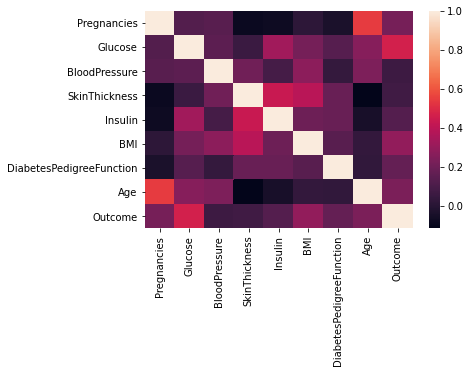

In [70]:
sns.heatmap(data.corr())

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
error=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    error.append(sum(y_test!=pred))
k=error.index(min(error))+1
k

34

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
sc=MinMaxScaler()

In [77]:
x_train=sc.fit_transform(x_train)

In [78]:
x_test=sc.transform(x_test)

In [79]:
knn=KNeighborsClassifier(n_neighbors=k)

In [80]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=34)

In [81]:
pred=pd.DataFrame(knn.predict(x_test))

In [82]:
pred

,0
0,0
1,1
2,0
3,0
4,0
...,...
149,1
150,0
151,0
152,0


In [83]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [84]:
confusion_matrix(y_test,pred)

array([[94,  9],
       [26, 25]], dtype=int64)

In [85]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       103
           1       0.74      0.49      0.59        51

    accuracy                           0.77       154
   macro avg       0.76      0.70      0.72       154
weighted avg       0.77      0.77      0.76       154



In [86]:
accuracy_score(y_test,pred)

0.7727272727272727

In [87]:
from sklearn.naive_bayes import MultinomialNB

In [88]:
nb=MultinomialNB()

In [89]:
nb.fit(x_train,y_train)

MultinomialNB()

In [90]:
prednb=nb.predict(x_test)

In [91]:
prednb=pd.DataFrame(prednb)

In [92]:
prednb

,0
0,0
1,0
2,0
3,0
4,0
...,...
149,0
150,0
151,0
152,0


In [93]:
accuracy_score(y_test,prednb)

0.6688311688311688

In [94]:
x_t,x_te,y_t,y_te=train_test_split(data,y,test_size=0.2)

In [95]:
from sklearn.decomposition import PCA

In [96]:
pca=PCA(n_components=2)

In [97]:
sc2=MinMaxScaler()
x_t=sc2.fit_transform(x_t)
x_te=sc2.transform(x_te)

In [98]:
pca.fit(x_t)

PCA(n_components=2)

In [99]:
pcadf=pd.DataFrame(pca.transform(x_t))
pcadf

,0,1
0,-0.418905,-0.218126
1,-0.390738,-0.147676
2,-0.376847,-0.101157
3,-0.338944,0.068239
4,0.741041,0.099494
...,...,...
609,0.743931,0.249220
610,-0.471579,-0.138536
611,-0.379046,-0.307320
612,0.753731,-0.083608


In [100]:
knn.fit(x_t,y_t)

KNeighborsClassifier(n_neighbors=34)

In [101]:
knn.predict(x_te)

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1],
      dtype=int64)

In [102]:
accuracy_score(y_te,knn.predict(x_te))

1.0

DEEP LEARNING

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [104]:
sq=Sequential()

sq.add(Dense(100,activation='relu'))
sq.add(Dropout(0.5))

sq.add(Dense(40,activation='relu'))
sq.add(Dropout(0.5))

sq.add(Dense(15,activation='relu'))
sq.add(Dropout(0.5))

sq.add(Dense(1,activation='sigmoid'))

sq.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [105]:
from tensorflow.keras.callbacks import EarlyStopping

In [106]:
stop=EarlyStopping(monitor='val_loss',mode='min',patience=2)

In [107]:
sq.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=stop,epochs=120)

Epoch 1/120
20/20 [==============================] - 0s 14ms/step - loss: 0.6883 - accuracy: 0.5684 - val_loss: 0.6694 - val_accuracy: 0.6688
Epoch 2/120
20/20 [==============================] - 0s 4ms/step - loss: 0.6668 - accuracy: 0.6189 - val_loss: 0.6627 - val_accuracy: 0.6688
Epoch 3/120
20/20 [==============================] - 0s 4ms/step - loss: 0.6730 - accuracy: 0.6287 - val_loss: 0.6600 - val_accuracy: 0.6688
Epoch 4/120
20/20 [==============================] - 0s 3ms/step - loss: 0.6677 - accuracy: 0.6417 - val_loss: 0.6568 - val_accuracy: 0.6688
Epoch 5/120
20/20 [==============================] - 0s 3ms/step - loss: 0.6674 - accuracy: 0.6401 - val_loss: 0.6538 - val_accuracy: 0.6688
Epoch 6/120
20/20 [==============================] - 0s 3ms/step - loss: 0.6719 - accuracy: 0.6466 - val_loss: 0.6491 - val_accuracy: 0.6688
Epoch 7/120
20/20 [==============================] - 0s 3ms/step - loss: 0.6726 - accuracy: 0.6417 - val_loss: 0.6401 - val_accuracy: 0.6688
Epoch 8/120


In [108]:
loss=pd.DataFrame(sq.history.history)

In [109]:
loss

,loss,accuracy,val_loss,val_accuracy
0,0.688287,0.568404,0.669442,0.668831
1,0.666793,0.618892,0.662672,0.668831
2,0.673045,0.628664,0.659954,0.668831
3,0.667742,0.641694,0.656750,0.668831
4,0.667418,0.640065,0.653845,0.668831
5,0.671941,0.646580,0.649085,0.668831
6,0.672626,0.641694,0.640134,0.668831
7,0.646444,0.661238,0.632699,0.668831
8,0.664795,0.640065,0.628306,0.668831
9,0.653150,0.661238,0.625435,0.668831


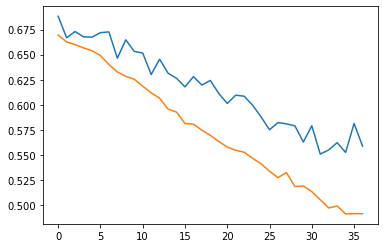

In [110]:
plt.plot(loss['loss'])
plt.plot(loss['val_loss'])

In [111]:
preddeep=pd.DataFrame(sq.predict_classes(x_test))

In [112]:
accuracy_score(y_test,preddeep)

0.7597402597402597

In [113]:
sq.save('Glucose_prediction.h5')

In [114]:
import joblib

In [115]:
joblib.dump(sc,'scaler.pkl')

['scaler.pkl']

In [116]:
from tensorflow.keras.models import load_model

In [117]:
new_model=load_model('Glucose_prediction.h5')

In [118]:
new_scaler=joblib.load('scaler.pkl')

In [119]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [134]:
def api_functn(model,scaler,sample_json):
    single=[]
    for v in sample_json.values():
        single.append(v)
    single=[single]
    single_scaled=scaler.transform(single)
    return model.predict_classes(single_scaled)
    

In [121]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [124]:
x_test.iloc[9]

Pregnancies                   5.000
Glucose                     132.000
BloodPressure                80.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          26.800
DiabetesPedigreeFunction      0.186
Age                          69.000
Name: 123, dtype: float64

In [139]:
from flask import jsonify
a={
    "Pregnancies":5.000,
    "Glucose":132.000,
    "BloodPressure":80.000,
    "SkinThickness":0.000,
    "Insulin ":0.000,
    "BMI":26.800,
    "DiabetesPedigreeFunction":0.186,
    "Age":69.000
}
result=api_functn(new_model,new_scaler,a)


In [142]:
result[0][0]

0

In [144]:
y_test.iloc[9]

0